# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [48]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
print(len(cities))

621


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [175]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

city_data = []

print("Beginning Data Retrieval")
print("-------------------------------------")

record_count = 0

for city in cities:
    
    city_url = url + "&q=" + city
    record_count = record_count + 1
    print("Processing record #" + str(record_count) + ": " + city)
    
    try:
        response = requests.get(city_url).json()
        
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval
-------------------------------------
Processing record #1: bubaque
Processing record #2: coahuayana
Processing record #3: povenets
Processing record #4: san quintin
Processing record #5: ushuaia
Processing record #6: cidreira
Processing record #7: itoman
Processing record #8: barrow
Processing record #9: georgetown
Processing record #10: san patricio
Processing record #11: cortez
Processing record #12: hobart
Processing record #13: new norfolk
Processing record #14: chuy
Processing record #15: navapur
City not found. Skipping...
Processing record #16: vostok
Processing record #17: walvis bay
Processing record #18: taolanaro
City not found. Skipping...
Processing record #19: leogane
Processing record #20: doha
Processing record #21: atasu
Processing record #22: rikitea
Processing record #23: jamestown
Processing record #24: bluff
Processing record #25: vardo
Processing record #26: saldanha
Processing record #27: lebu
Processing record #28: castro
Processing rec

Processing record #236: marrakesh
Processing record #237: saint anthony
Processing record #238: grand island
Processing record #239: zlitan
Processing record #240: kambove
Processing record #241: shirokiy
Processing record #242: grand gaube
Processing record #243: maniitsoq
Processing record #244: flin flon
Processing record #245: lewistown
Processing record #246: margate
Processing record #247: baiyin
Processing record #248: itarema
Processing record #249: sentyabrskiy
City not found. Skipping...
Processing record #250: lagos
Processing record #251: krasnoselkup
Processing record #252: verkhnevilyuysk
Processing record #253: faya
Processing record #254: preobrazheniye
Processing record #255: wahran
City not found. Skipping...
Processing record #256: ribeira grande
Processing record #257: tura
Processing record #258: bandarbeyla
Processing record #259: bezhanitsy
Processing record #260: poyarkovo
Processing record #261: synya
Processing record #262: sodertalje
City not found. Skipping.

Processing record #463: torbay
Processing record #464: casas grandes
Processing record #465: vestmannaeyjar
Processing record #466: balkanabat
Processing record #467: chulym
Processing record #468: zamora
Processing record #469: chipinge
Processing record #470: pouebo
Processing record #471: alyangula
Processing record #472: oussouye
Processing record #473: ostersund
Processing record #474: sabang
Processing record #475: ixtapa
Processing record #476: banjar
Processing record #477: bull savanna
Processing record #478: mayo
Processing record #479: semirom
Processing record #480: kabo
Processing record #481: nador
Processing record #482: aswan
Processing record #483: inverness
Processing record #484: teguise
Processing record #485: mengcheng
Processing record #486: voyvozh
Processing record #487: chara
Processing record #488: urumqi
Processing record #489: gusau
Processing record #490: floriano
Processing record #491: barra do garcas
Processing record #492: sarkand
Processing record #493

In [176]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bubaque,11.28,-15.83,78.15,70,1,15.73,GW,1585455663
1,coahuayana,18.73,-103.68,73.18,60,0,1.61,MX,1585455663
2,povenets,62.85,34.83,24.24,93,100,6.33,RU,1585455663
3,san quintin,30.48,-115.95,57.45,71,98,16.17,MX,1585455663
4,ushuaia,-54.80,-68.30,42.80,81,40,8.05,AR,1585455386
...,...,...,...,...,...,...,...,...,...
574,noumea,-22.28,166.46,80.01,65,90,18.34,NC,1585455655
575,ghanzi,-21.57,21.78,70.63,46,81,6.15,BW,1585455799
576,bulgan,48.81,103.53,38.66,33,88,4.36,MN,1585455799
577,rjukan,59.88,8.59,11.50,76,0,7.02,NO,1585455800


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [177]:
city_data_pd.to_csv(r'city_data_csv', index = False)

In [178]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bubaque,11.28,-15.83,78.15,70,1,15.73,GW,1585455663
1,coahuayana,18.73,-103.68,73.18,60,0,1.61,MX,1585455663
2,povenets,62.85,34.83,24.24,93,100,6.33,RU,1585455663
3,san quintin,30.48,-115.95,57.45,71,98,16.17,MX,1585455663
4,ushuaia,-54.80,-68.30,42.80,81,40,8.05,AR,1585455386


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

The graph shows that as the Latitude gets closer to 0 (near the equator), the temperature tends to rise.


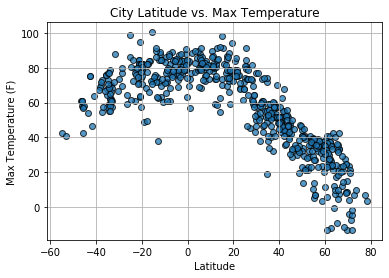

In [193]:
plt.scatter(city_data_pd['Lat'], city_data_pd['Max Temp'], marker='o', edgecolors='black', alpha = 0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.title('City Latitude vs. Max Temperature')
plt.savefig('Fig1.png')
print("The graph shows that as the Latitude gets closer to 0 (near the equator), the temperature tends to rise.")

#### Latitude vs. Humidity Plot

The scatter plot does not show any trending between Latitude and Humidity.


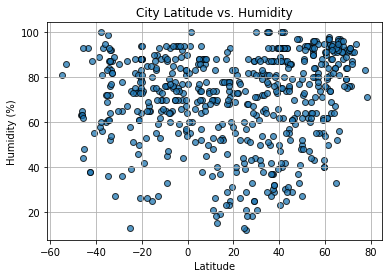

In [194]:
plt.scatter(city_data_pd['Lat'], city_data_pd['Humidity'], marker='o', edgecolors='black', alpha = 0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid(True)
plt.savefig('Fig2.png')
print('The scatter plot does not show any trending between Latitude and Humidity.')

#### Latitude vs. Cloudiness Plot

The scatter plot does not show any trending between Latitude and Cloudiness.


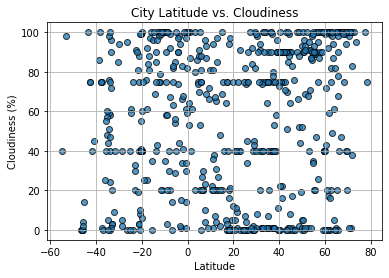

In [195]:
plt.scatter(city_data_pd['Lat'], city_data_pd['Cloudiness'], marker='o', edgecolors='black', alpha = 0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid(True)
plt.savefig('Fig3.png')
print('The scatter plot does not show any trending between Latitude and Cloudiness.')

#### Latitude vs. Wind Speed Plot

The scatter plot does not show any trending between Latitude and Wind Speed.


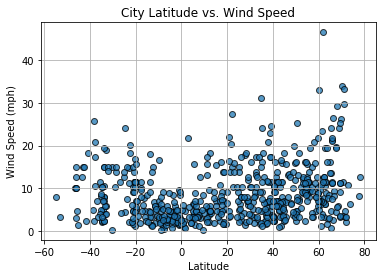

In [196]:
plt.scatter(city_data_pd['Lat'], city_data_pd['Wind Speed'], marker='o', edgecolors='black', alpha = 0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.grid(True)
plt.savefig('Fig4.png')
print('The scatter plot does not show any trending between Latitude and Wind Speed.')

## Linear Regression

In [183]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linregress(x_values, y_values, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    linregress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.plot(x_values, linregress_values, color='red')
    plt.annotate(line_eq, coordinates, fontsize=15,color="red")
    print('The r-sqaured value is '+ str(round(rvalue,2)))

In [184]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi_df = city_data_pd.loc[city_data_pd['Lat']>=0,:]
south_hemi_df = city_data_pd.loc[city_data_pd['Lat']<0,:]
south_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,ushuaia,-54.80,-68.30,42.80,81,40,8.05,AR,1585455386
5,cidreira,-30.18,-50.21,73.29,86,94,14.88,BR,1585455664
11,hobart,-42.88,147.33,75.20,38,75,14.99,AU,1585455611
12,new norfolk,-42.78,147.06,75.20,38,75,14.99,AU,1585455666
13,chuy,-33.70,-53.46,70.02,92,90,7.85,UY,1585455666
...,...,...,...,...,...,...,...,...,...
567,tual,-5.67,132.75,83.77,70,56,4.92,ID,1585455797
569,port-gentil,-0.72,8.78,81.32,83,1,9.22,GA,1585455798
570,bom sucesso,-21.03,-44.76,63.52,73,99,3.04,BR,1585455798
574,noumea,-22.28,166.46,80.01,65,90,18.34,NC,1585455655


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-sqaured value is -0.9


Text(0.5, 1.0, 'Northern Hemisphere - Max Temp vs. Latitude')

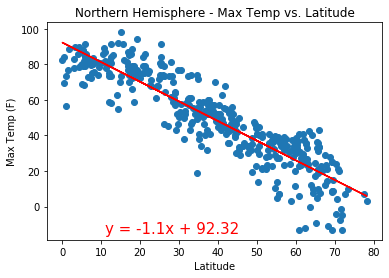

In [185]:
plt.scatter(north_hemi_df['Lat'], north_hemi_df['Max Temp'])
plot_linregress(north_hemi_df['Lat'], north_hemi_df['Max Temp'], (11, -15))
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-sqaured value is 0.55


Text(0.5, 1.0, 'Southern Hemisphere - Max Temp vs. Latitude')

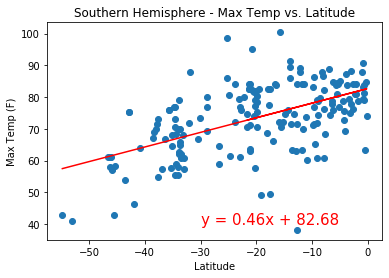

In [186]:
plt.scatter(south_hemi_df['Lat'], south_hemi_df['Max Temp'])
plot_linregress(south_hemi_df['Lat'], south_hemi_df['Max Temp'], (-30, 40))
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-sqaured value is 0.3


Text(0.5, 1.0, 'Northern Hemisphere - Humidity vs. Latitude')

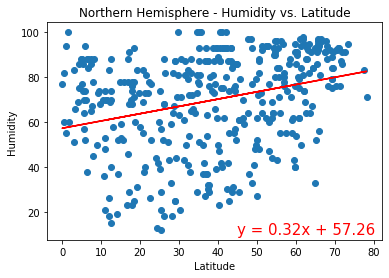

In [187]:
plt.scatter(north_hemi_df['Lat'], north_hemi_df['Humidity'])
plot_linregress(north_hemi_df['Lat'], north_hemi_df['Humidity'], (45, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-sqaured value is 0.06


Text(0.5, 1.0, 'Southern Hemisphere - Humidity vs. Latitude')

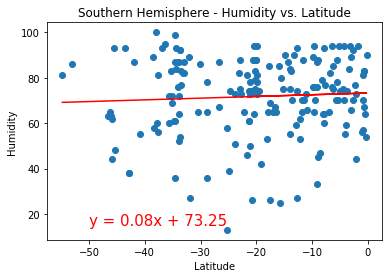

In [188]:
plt.scatter(south_hemi_df['Lat'], south_hemi_df['Humidity'])
plot_linregress(south_hemi_df['Lat'], south_hemi_df['Humidity'], (-50, 15))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-sqaured value is 0.25


Text(0.5, 1.0, 'Northern Hemisphere - Cloudiness vs. Latitude')

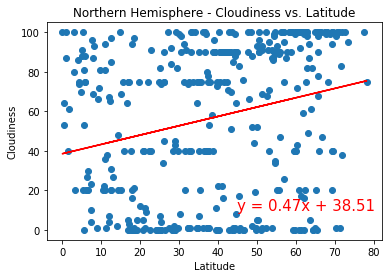

In [189]:
plt.scatter(north_hemi_df['Lat'], north_hemi_df['Cloudiness'])
plot_linregress(north_hemi_df['Lat'], north_hemi_df['Cloudiness'], (45, 10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-sqaured value is 0.26


Text(0.5, 1.0, 'Southern Hemisphere - Cloudiness vs. Latitude')

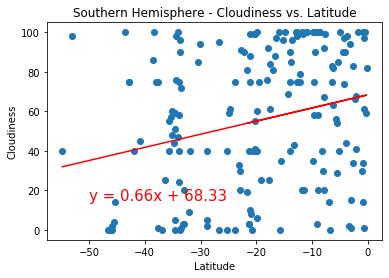

In [190]:
plt.scatter(south_hemi_df['Lat'], south_hemi_df['Cloudiness'])
plot_linregress(south_hemi_df['Lat'], south_hemi_df['Cloudiness'], (-50, 15))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-sqaured value is 0.29


Text(0.5, 1.0, 'Northern Hemisphere - Wind Speed vs. Latitude')

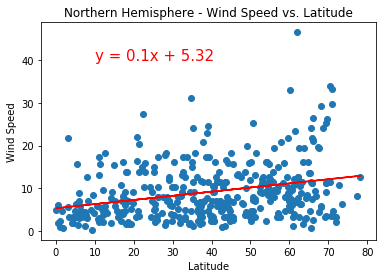

In [191]:
plt.scatter(north_hemi_df['Lat'], north_hemi_df['Wind Speed'])
plot_linregress(north_hemi_df['Lat'], north_hemi_df['Wind Speed'], (10, 40))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-sqaured value is -0.38


Text(0.5, 1.0, 'Southern Hemisphere - Wind Speed vs. Latitude')

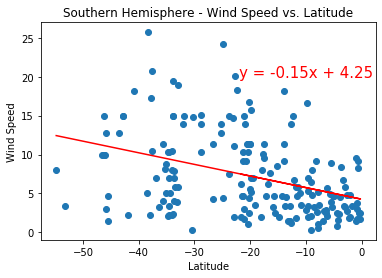

In [192]:
plt.scatter(south_hemi_df['Lat'], south_hemi_df['Wind Speed'])
plot_linregress(south_hemi_df['Lat'], south_hemi_df['Wind Speed'], (-22, 20))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')